---
title: Dihedrals and Ramachandran plots
---

This notebook requires biopython and PeptideBuilder, which can be installed through pip with

```
pip install biopython PeptideBuilder
```

In [1]:
import Bio
import PeptideBuilder as PB
import itertools
import numpy as np

In [2]:
VDW_RADII = {
    "H" : 1.20,
    "C" : 1.70,
    "N" : 1.55,
    "O" : 1.52,
    "P" : 1.80,
    "S" : 1.80,
}

RAM_ALLOWED_RADII = {
    "CC" : 3.20,
    "CO" : 2.80,
    "OC" : 2.80,
    "CN" : 2.90,
    "NC" : 2.90,
    "CH" : 2.40,
    "HC" : 2.40,
    "OO" : 2.80,
    "ON" : 2.70,
    "NO" : 2.70,
    "OH" : 2.40,
    "HO" : 2.40,
    "NN" : 2.70,
    "NH" : 2.40,
    "HN" : 2.40,
    "HH" : 2.00,
}

# returns 1 if there are clashes, 0 otherwise
def energy(structure):
    exclude_interactions = {
        "CA" : ["N", "H"],
        "CB" : [],
        "C" : ["CA", "N", "O", "H"],
        "O" : ["N", "CA"],
        "N" : [],
        "H" : []
    }
    
    def overlap(p, q):
        p_elem = p.name[0]
        q_elem = q.name[0]
        #radius = (VDW_RADII[p_elem] + VDW_RADII[q_elem]) * 0.88 # heuristic rescaling factor used by Ramachandran et al
        radius = (RAM_ALLOWED_RADII[p_elem + q_elem])
        return np.linalg.norm(p - q) < radius
        
    
    residues = list(structure.get_residues())
    for idx, residue in enumerate(residues[:-1]):
        next_res = residues[idx + 1]
        for p_atom in residue.get_atoms():
            for q_atom in next_res.get_atoms():
                if not q_atom.name in exclude_interactions[p_atom.name]:
                    if overlap(p_atom, q_atom):
                        print(p_atom.name, q_atom.name)
                        return 1
        
    return 0


def add_hydrogens(residue, C, N, Ca):
    N_pos = np.array(N.get_coord())
    Ca_pos = np.array(Ca.get_coord())
    C_pos = np.array(C.get_coord())
    
    N_H = (N_pos - C_pos) + (N_pos - Ca_pos)
    N_H /= np.dot(N_H, N_H)
    
    hydrogen_N_pos = N_pos + N_H * 1.01
    H_atom = Bio.PDB.Atom.Atom('H', hydrogen_N_pos, 0.0, 1.0, ' ', ' H', 0, 'H')
    residue.add(H_atom)

In [6]:
geo_ends = PB.Geometry.geometry("G")
structure = PB.initialize_res(geo_ends)
PB.add_residue(structure, "G", -5, 0)
PB.add_residue(structure, geo_ends)

residues = list(structure.get_residues())
add_hydrogens(residues[1], residues[0]["C"], residues[1]["N"], residues[1]["CA"])
add_hydrogens(residues[2], residues[1]["C"], residues[2]["N"], residues[2]["CA"])

out = Bio.PDB.PDBIO()
out.set_structure(structure)
out.save("example.pdb")

In [7]:
import matplotlib.pyplot as plt
from matplotlib import colors

phis = np.array(list(range(-180, 181, 20)))
psis = np.array(list(range(-180, 181, 20)))
energies = np.zeros((phis.shape[0], psis.shape[0]))
first_geo = PB.Geometry.geometry("G")
for i, phi in enumerate(phis):
    second_geo = PB.Geometry.geometry("G")
    second_geo.phi = phi
    for j, psi in enumerate(psis):
        third_geo = PB.Geometry.geometry("G")
        third_geo.psi_im1 = psi
        
        structure = PB.initialize_res(first_geo)
        PB.add_residue(structure, second_geo)
        PB.add_residue(structure, third_geo)
        
        residues = list(structure.get_residues())
        add_hydrogens(residues[1], residues[0]["C"], residues[1]["N"], residues[1]["CA"])
        add_hydrogens(residues[2], residues[1]["C"], residues[2]["N"], residues[2]["CA"])
        
        energies[j, i] = energy(structure)


N N
N N
N N
N N
N N
N N
N N
N N
N N
N N
N N
N N
N N
N N
N N
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
C C
N N
N N
N N
N N
N N
N N
N N
N N
N N
N N
N N
N N
N N
N N
N N


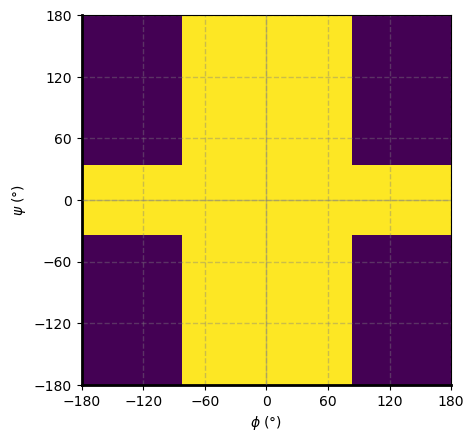

In [85]:
def format_axis(axis):
    zero_lines_kwargs = {
        "colors" : ["Grey"], 
        "alpha" : 0.4, 
        "zorder" : 3, 
        "linewidths" : [1]
        }

    axis.grid(alpha=0.4, linestyle="--", linewidth=1, color="Grey", zorder=3)
    axis.hlines(0, -180, 180, **zero_lines_kwargs)
    axis.vlines(0, -180, 180, **zero_lines_kwargs)
    
    axis.set_xlim((-180, 180))
    axis.set_ylim((-180, 180))
    axis.set_xlabel(u"$\phi$ (\u00B0)")	# phi
    axis.set_ylabel(u"$\psi$ (\u00B0)")	# psi

    axis.set_xticks([-180, -120, -60, 0, 60, 120, 180])
    axis.set_yticks([-180, -120, -60, 0, 60, 120, 180])

    ax_linewidth = 2
    axis.spines["left"].set_linewidth(ax_linewidth)
    axis.spines["bottom"].set_linewidth(ax_linewidth)
    
fig, ax = plt.subplots()
kwargs = {
    "bins" : 140, 
    "norm" : colors.PowerNorm(0.1),
    "alpha" : 1}

ax.imshow(energies, extent=(-180, 180, -180, 180))
format_axis(ax)

In [89]:
out = Bio.PDB.PDBIO()
out.set_structure(structure)
out.save("example.pdb")

In [9]:
structure = PB.initialize_res("A")
for i in range(20):
    PB.add_residue(structure, "A", -60, -45)
out = Bio.PDB.PDBIO()
out.set_structure(structure)
out.save("alpha_helix.pdb")